<a href="https://colab.research.google.com/github/danielamattos/Projetos---Master-Data-Decision-Science/blob/main/Atividade_Regress%C3%A3o_Log%C3%ADstica(Machine_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística Binária

Para está atividade iremos utilizar um dataset sobre fraudes em cartão de crédito obtido do [kaggle](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?select=card_transdata.csv).

Esse conjunto de dados possui as variáveis:

* distance_from_home - distância entre a casa e o local onde a transação foi feita.

* distance_from_last_transaction - a distância do local em que a última transação ocorreu.

* ratio_to_median_purchase_price - Razão entre preço da transação e o preço médio de transação.

* repeat_retailer - Se a transação ocorreu na mesma loja.

* used_chip - Se a transação foi feita com cartão de crédito.

* used_pin_number - Se a transação ocorreu usando número PIN.

* online_order - Se a transação foi online.

* fraud - Se a transação é fraudulenta.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Atividade 1: Carregue os dados e verifique se há dados faltantes. Se houver, faça o tratamento que julgar adequado.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/sirius/card_transdata.csv')

df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Não há nenhum dado faltante.

Obs: Na célula abaixo há um código para renomear as colunas.

In [ ]:
# renomeando as colunas
df.columns = ['dist_casa','dist_ultima_transacao','razao_preco_medio',
              'loja_repetida','usou_chip','usou_pin','online','fraude']

In [ ]:
df.head()

,dist_casa,dist_ultima_transacao,razao_preco_medio,loja_repetida,usou_chip,usou_pin,online,fraude
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## Atividade 2: Selecione as variáveis que achar interessante para tentar prever se houve ou não fraude. Aproveite para verificar se há correlação entre as variáveis.

Iremos utilizar todas as variáveis do dataset no modelo para tentar prever se houve ou não fraude.

## Atividade 3: Verifique se há desbalanceamento da variável `fraude`. Se houver, faça um balanceamento de classes.

In [ ]:
df['fraude'].value_counts()

0.0    912597
1.0     87403
Name: fraude, dtype: int64

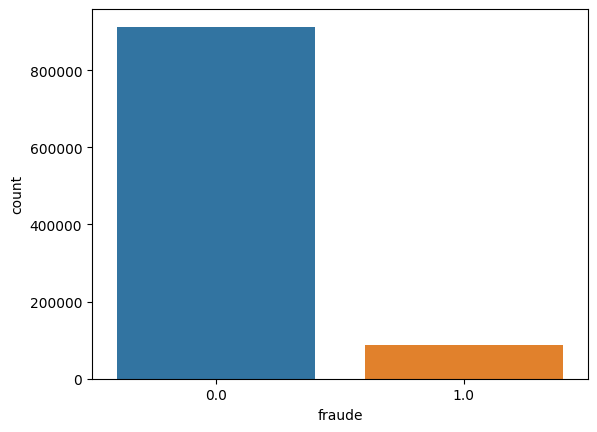

In [ ]:
import seaborn as sns

sns.countplot(x=df['fraude']);

Se as classes estiverem desbalanceadas execute o código a seguir.

Existem várias técnicas de balanceamento. Como temos muitas observações, vamos usar uma técnica chamada undersampling. Esta técnica consiste em descartar observações da classe que possui mais observações até que as duas classes tenham a mesma quantidade.

Por exemplo, se temos duas classes, uma com 1000 observações para a classe A e outra com 100 observações para a classe B, então iremos selecionar apenas 100 observações (aleatoriamente) da classe A dentre as 1000. Dessa maneira iremos ter 100 observações de cada classe.

In [ ]:
# separando as variáveis X e y
X = df[['dist_casa','dist_ultima_transacao','razao_preco_medio',
              'loja_repetida','usou_chip','usou_pin','online']]
y = df['fraude']

# balanceando as classes com undersampling
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X, y = undersample.fit_resample(X, y)

In [ ]:
y.value_counts()

0.0    87403
1.0    87403
Name: fraude, dtype: int64

## Atividade 4: Crie um modelo de regressão logística.

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=10000)

In [ ]:
X = sm.add_constant(X)

In [ ]:
modelo = sm.Logit(y, X).fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.213430
         Iterations 10


In [ ]:
modelo.params

const                    -7.653858
dist_casa                 0.028582
dist_ultima_transacao     0.051796
razao_preco_medio         1.203611
loja_repetida            -1.414076
usou_chip                -1.184067
usou_pin                -10.168172
online                    5.017789
dtype: float64

## Atividade 5: Verifique os parâmetros do modelo e se eles são relevantes.

In [ ]:
print(modelo.summary())

                           Logit Regression Results                           
Dep. Variable:                 fraude   No. Observations:               174806
Model:                          Logit   Df Residuals:                   174798
Method:                           MLE   Df Model:                            7
Date:                Sun, 23 Apr 2023   Pseudo R-squ.:                  0.6921
Time:                        20:36:45   Log-Likelihood:                -37309.
converged:                       True   LL-Null:                   -1.2117e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.6539      0.054   -142.690      0.000      -7.759      -7.549
dist_casa                 0.0286      0.000    130.023      0.000       0.028       0.029
dist_ult

O p-valor do modelo é menor do que 0.05 e o pseudo R² é 0.69, o que indica que o modelo é adequado e que ele consegue prever 69% da variabilidade dos dados.

Todas as variáveis possuem P>|z| menor que 0.05, o que indica que todas as variáveis utilizadas são relevantes para o modelo.

## Atividade 6: Crie a matriz de confusão e o mapa de calor correspondente.


In [ ]:
modelo.predict(X)

0         0.155204
1         0.023482
2         0.183039
3         0.000119
4         0.000543
            ...   
174801    0.999648
174802    0.752674
174803    0.508992
174804    1.000000
174805    0.999809
Length: 174806, dtype: float64

In [ ]:
y_pred = (modelo.predict(X) >= 0.5).astype(int)

In [ ]:
y_pred

0         0
1         0
2         0
3         0
4         0
         ..
174801    1
174802    1
174803    1
174804    1
174805    1
Length: 174806, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y, y_pred)
matriz_confusao

array([[81483,  5920],
       [ 4484, 82919]])

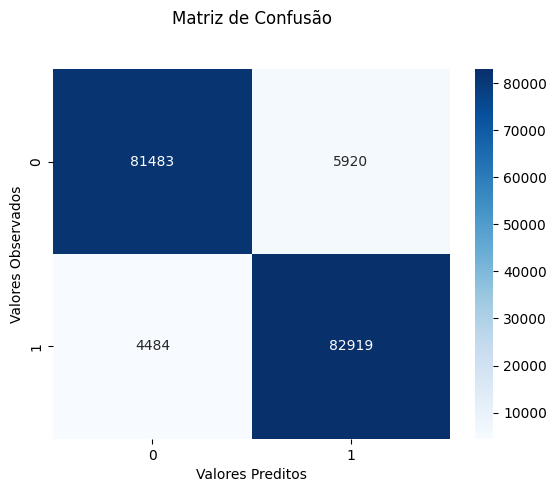

In [ ]:
import matplotlib.pyplot as plt

sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

Verdadeiros positivos: 81483

Verdadeiros negativos: 82919

Falsos positivos: 5920

Falsos negativos: 4484

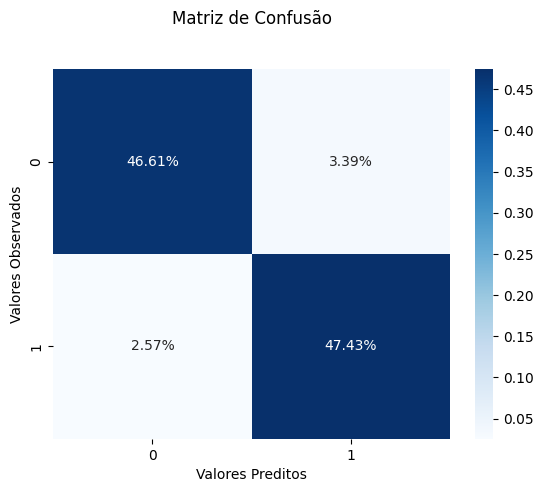

In [ ]:
import numpy as np

sns.heatmap(matriz_confusao/np.sum(matriz_confusao),
            annot=True, fmt='.2%', cmap='Blues');
            
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

## Atividade 7: Verifique as outras métricas (sensibilidade, especificidade, f1-score).

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     87403
         1.0       0.93      0.95      0.94     87403

    accuracy                           0.94    174806
   macro avg       0.94      0.94      0.94    174806
weighted avg       0.94      0.94      0.94    174806



O modelo possui 94% de acurácia, ou seja, está acertando 94% dos valores de y, sendo algo super relevante.

O modelo possui também 94% de recall, o que indica que ele está acertando 94% dos valores positivos. Sendo 95% para os valores 1, ou seja, para os casos fraudulentos, os quais estamos tentando identificar com o modelo.


## Atividade 8: Crie a curva ROC para este modelo.

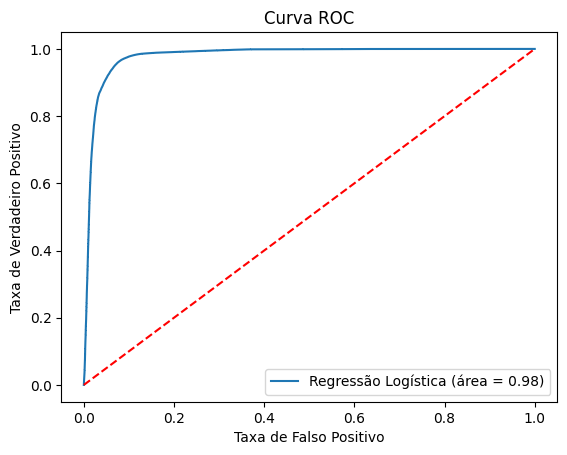

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

logit_roc_auc = roc_auc_score(y, modelo.predict(X))
fpr, tpr, thresholds = roc_curve(y, modelo.predict(X))
plt.plot(fpr, tpr, label=f'Regressão Logística (área = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right");

Quanto mais próximo de 1 a área sob a curva ROC estiver, melhor o modelo. Nesse modelo a área é de 0.98, indicando que o modelo está muito bom.

## Atividade 9: Preveja se uma transação com as características abaixo é ou não fraude.

* `dist_casa = 82`
* `dist_ultima_transacao = 13`
* `razao_preco_medio = 14`
* `loja_repetida = 1`
* `usou_chip = 0`
* `usou_pin = 0`
* `online = 1`

In [ ]:
lista = [1, 82, 13, 14, 1, 0, 0, 1]

In [ ]:
modelo.predict(lista)

array([0.99999986])

A transação possui 99,99% de chance de ser fraudulenta, podemos considerar que é uma fraude.

## Atividade 10: Refaça os exercícios sem realizar o balanceamento de classe e verifique se ocorre algum problema.

In [ ]:
X2 = df[['dist_casa','dist_ultima_transacao','razao_preco_medio',
              'loja_repetida','usou_chip','usou_pin','online']]
y2 = df['fraude']

In [ ]:
df['fraude'].value_counts()

0.0    912597
1.0     87403
Name: fraude, dtype: int64

In [ ]:
X2 = sm.add_constant(X2)

In [ ]:
modelo2 = sm.Logit(y2, X2).fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.135695
         Iterations 12


In [ ]:
modelo2.params

const                   -10.361061
dist_casa                 0.015217
dist_ultima_transacao     0.025258
razao_preco_medio         0.862251
loja_repetida            -0.621471
usou_chip                -1.049060
usou_pin                -13.740402
online                    6.651379
dtype: float64

In [ ]:
print(modelo2.summary())

                           Logit Regression Results                           
Dep. Variable:                 fraude   No. Observations:              1000000
Model:                          Logit   Df Residuals:                   999992
Method:                           MLE   Df Model:                            7
Date:                Sun, 23 Apr 2023   Pseudo R-squ.:                  0.5423
Time:                        20:36:53   Log-Likelihood:            -1.3570e+05
converged:                       True   LL-Null:                   -2.9649e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -10.3611      0.044   -237.200      0.000     -10.447     -10.275
dist_casa                 0.0152   8.32e-05    182.831      0.000       0.015       0.015
dist_ult

In [ ]:
modelo2.predict(X2)

0         0.000078
1         0.000061
2         0.020542
3         0.007451
4         0.058587
            ...   
999995    0.000025
999996    0.000095
999997    0.005996
999998    0.020837
999999    0.015454
Length: 1000000, dtype: float64

In [ ]:
y_pred2 = (modelo2.predict(X2) >= 0.5).astype(int)

In [ ]:
matriz_confusao2 = confusion_matrix(y2, y_pred2)
matriz_confusao2

array([[906272,   6325],
       [ 34837,  52566]])

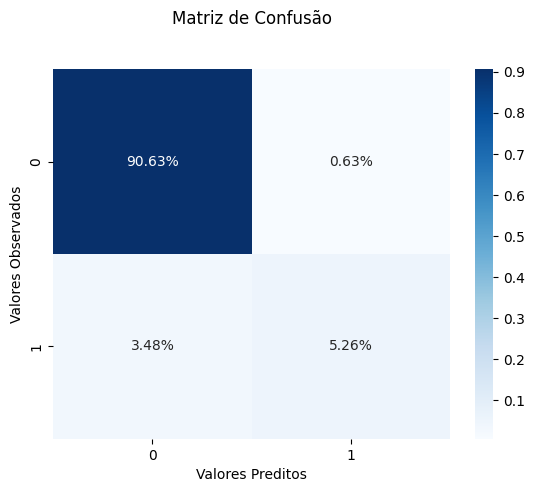

In [ ]:
sns.heatmap(matriz_confusao2/np.sum(matriz_confusao2),
            annot=True, fmt='.2%', cmap='Blues');
            
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

In [ ]:
print(classification_report(y2, y_pred2))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    912597
         1.0       0.89      0.60      0.72     87403

    accuracy                           0.96   1000000
   macro avg       0.93      0.80      0.85   1000000
weighted avg       0.96      0.96      0.96   1000000



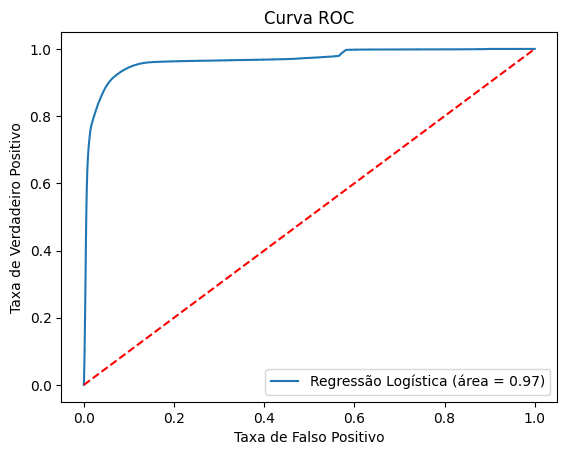

In [ ]:
logit_roc_auc = roc_auc_score(y2, modelo2.predict(X2))
fpr, tpr, thresholds = roc_curve(y2, modelo2.predict(X2))
plt.plot(fpr, tpr, label=f'Regressão Logística (área = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right");

Apesar de o modelo ter apresentado uma acurácia alta, uma área sobre a curva ROC boa, valores médios de recall e precision bons, ele apresenta um valor de 60% para o recall do valor 1, o que significa que só está acertando 60% das fraudes, o que não é bom para o nosso objetivo, pois queremos identificar o máximo possível de transações fraudulentas e não conseguimos identificar um número considerável com esse modelo. 